<a href="https://colab.research.google.com/github/micah-shull/ML_Classification_Loan_Defaults/blob/main/loan_defaults_002_eda_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Description

This dataset contains information on clients' credit card behavior, provided by a financial institution in Taiwan. The target variable is `default_payment_next_month`, which indicates whether the client defaulted on their credit card payment the next month.

url = https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

#### Variables:

- **ID**: ID of each client.
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit).
- **SEX**: Gender (1 = male, 2 = female).
- **EDUCATION**: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others, 5 = unknown, 6 = unknown).
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others).
- **AGE**: Age in years.

#### Payment History (PAY_X):
- **PAY_0**: Repayment status in September 2005 (-1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above).
- **PAY_2**: Repayment status in August 2005.
- **PAY_3**: Repayment status in July 2005.
- **PAY_4**: Repayment status in June 2005.
- **PAY_5**: Repayment status in May 2005.
- **PAY_6**: Repayment status in April 2005.

#### Bill Statement Amount (BILL_AMT_X):
- **BILL_AMT1**: Amount of bill statement in September 2005 (NT dollars).
- **BILL_AMT2**: Amount of bill statement in August 2005 (NT dollars).
- **BILL_AMT3**: Amount of bill statement in July 2005 (NT dollars).
- **BILL_AMT4**: Amount of bill statement in June 2005 (NT dollars).
- **BILL_AMT5**: Amount of bill statement in May 2005 (NT dollars).
- **BILL_AMT6**: Amount of bill statement in April 2005 (NT dollars).

#### Previous Payment Amount (PAY_AMT_X):
- **PAY_AMT1**: Amount of previous payment in September 2005 (NT dollars).
- **PAY_AMT2**: Amount of previous payment in August 2005 (NT dollars).
- **PAY_AMT3**: Amount of previous payment in July 2005 (NT dollars).
- **PAY_AMT4**: Amount of previous payment in June 2005 (NT dollars).
- **PAY_AMT5**: Amount of previous payment in May 2005 (NT dollars).
- **PAY_AMT6**: Amount of previous payment in April 2005 (NT dollars).

- **default_payment_next_month**: Default payment indicator (1 = yes, 0 = no).

#### Explanation for Feature Reordering:
The bill statement and payment amounts are listed in reverse chronological order in the dataset. To ensure that the feature names match the actual sequence of events, we reverse the column names for `BILL_AMT` and `PAY_AMT` features so that they correctly represent the time sequence from April 2005 to September 2005.



## Exploratory Data Analysis

To explore and visualize your loan default data, you can break down the process into the following steps. This strategy focuses on understanding the distribution, relationships, and key patterns within both categorical and numeric features. Here’s a structured approach:

### 1. **Understand the Data Structure**
   - **Inspect Data Types:** Identify which features are categorical and which are numeric. This will help decide the appropriate visualizations and analyses.
   - **Check for Missing Values:** Look for missing data and determine whether you need to fill, drop, or otherwise handle these missing values.
   - **Check for Duplicates:** Identify and handle any duplicate records if necessary.

### 2. **Distribution of Features**
   - **Univariate Analysis:**
     - For numeric features: Plot histograms, boxplots, and KDE plots to understand the distribution, outliers, and skewness.
     - For categorical features: Use bar plots or count plots to see the frequency distribution of each category.

### 3. **Outliers and Anomalies**
   - **Boxplots and Z-Scores:** Use boxplots and calculate Z-scores to detect and visualize outliers in numeric features.
   - **Targeted Outlier Detection:** Focus on outliers in features that are critical for predicting loan defaults.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loan_data_utils import load_and_preprocess_data, primary_columns, bill_columns, pay_columns, ordinal_columns, check_categorical_order
from eda_utils import data_overview, plot_univariate_distributions, plot_class_distribution
import logging

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['education', 'sex', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# print data overview
data_overview(X)

# Drop duplicate rows
X = X.drop_duplicates()

# Confirm the duplicates are removed
print(f"Number of Duplicate Rows After Dropping: {X.duplicated().sum()}")

# List of columns to check
pay_cols = [col for col in X.columns if col.startswith('pay_delay')]
# Check the order of categorical columns
check_categorical_order(X, categorical_columns + pay_cols)

Missing Values: 0
Missing Percentage: 0.0
Number of Duplicate Rows: 0

<class 'pandas.core.frame.DataFrame'>
Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   29965 non-null  int64   
 1   sex                         29965 non-null  category
 2   education                   29965 non-null  category
 3   marriage                    29965 non-null  category
 4   age                         29965 non-null  int64   
 5   bill_amt_4_april            29965 non-null  int64   
 6   bill_amt_5_may              29965 non-null  int64   
 7   bill_amt_6_june             29965 non-null  int64   
 8   bill_amt_7_july             29965 non-null  int64   
 9   bill_amt_8_august           29965 non-null  int64   
 10  bill_amt_9_september        29965 non-null  int64   
 11  pay_amt_4_april             29965 non-null  int64   
 12  pay_amt_

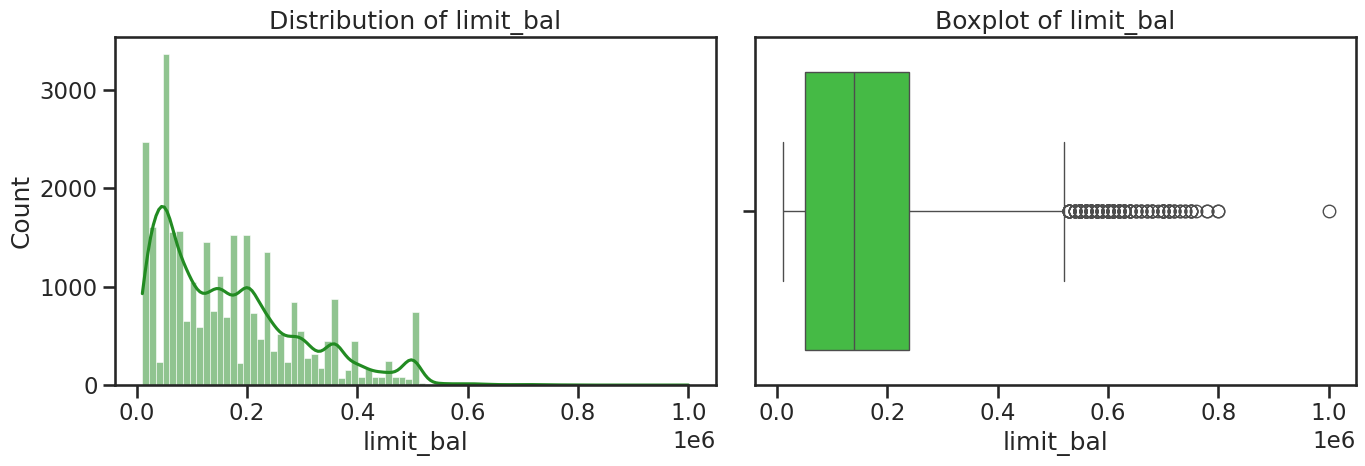

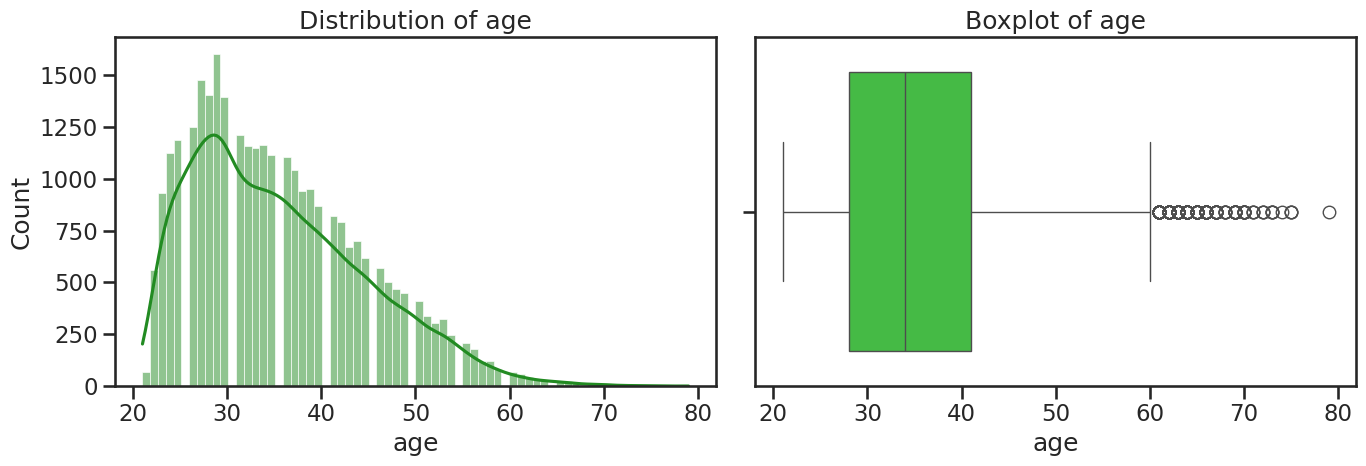

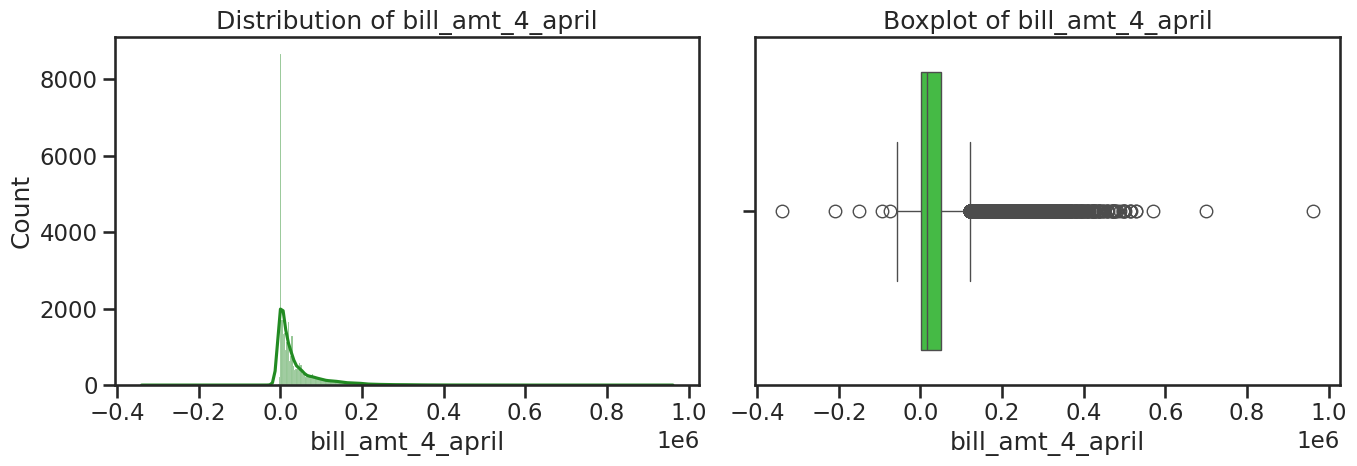

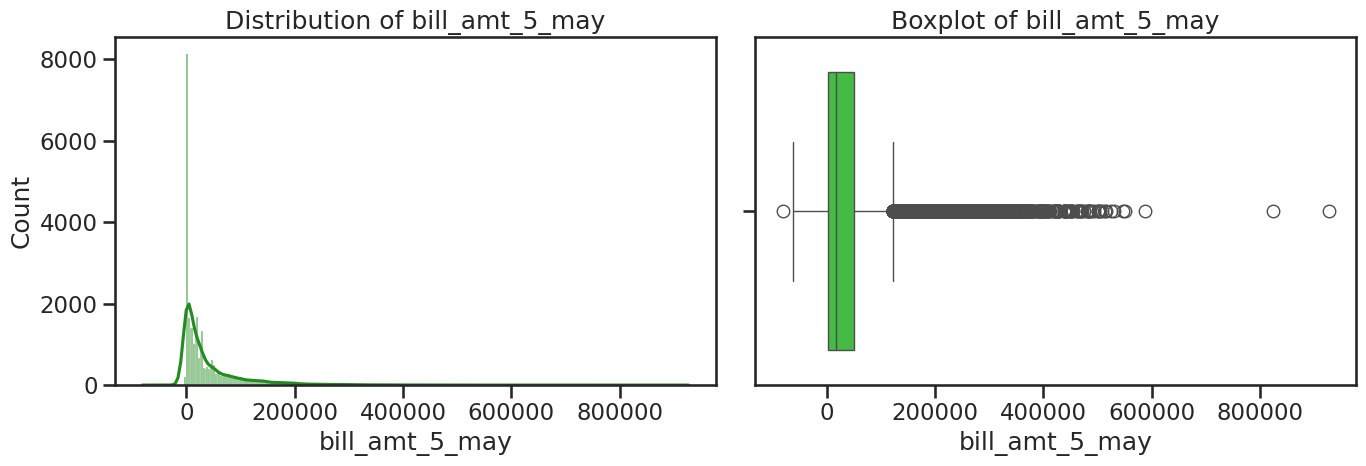

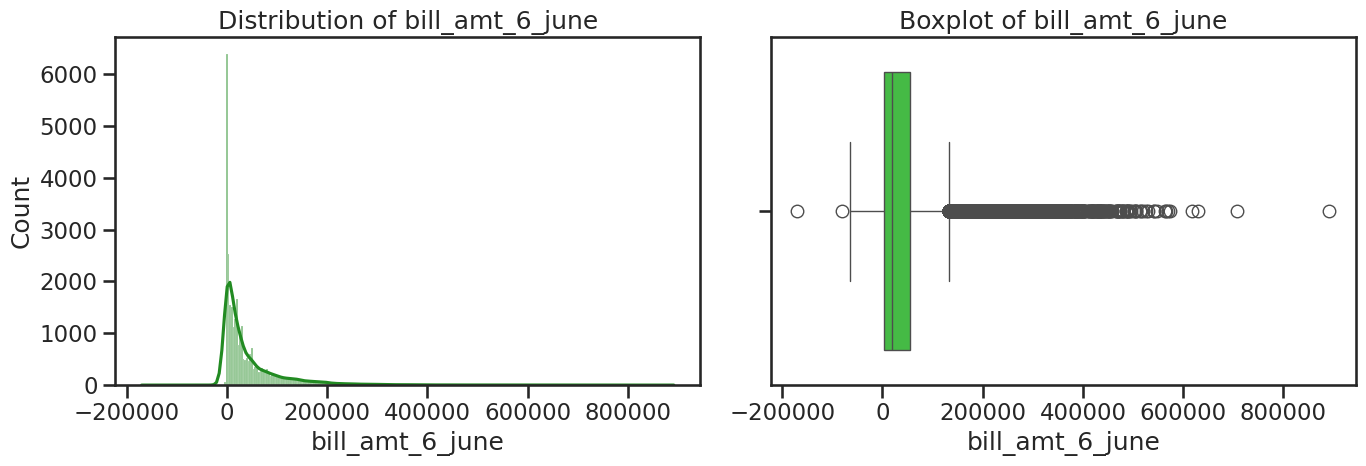

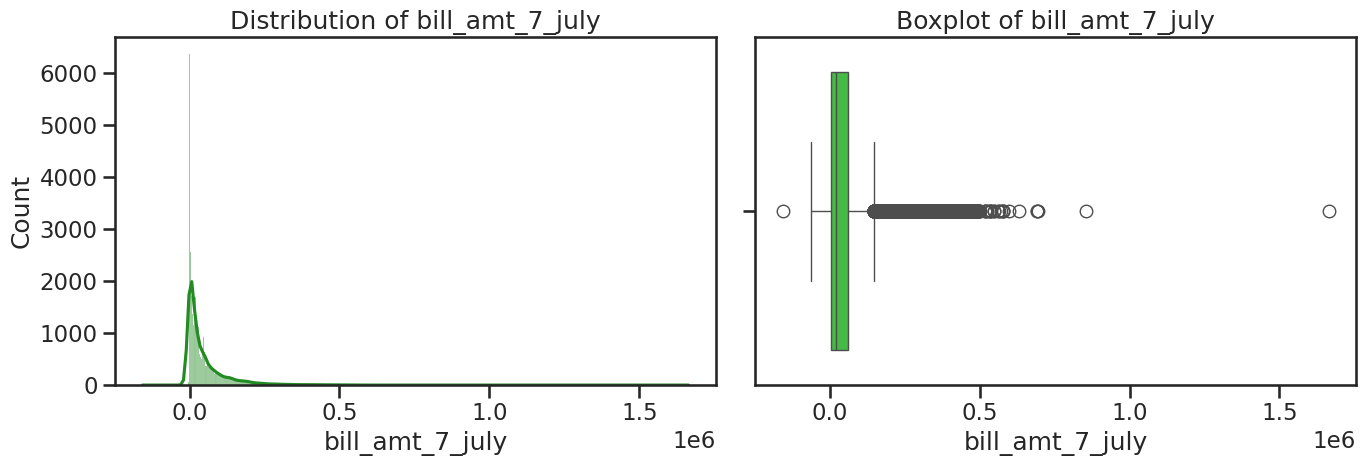

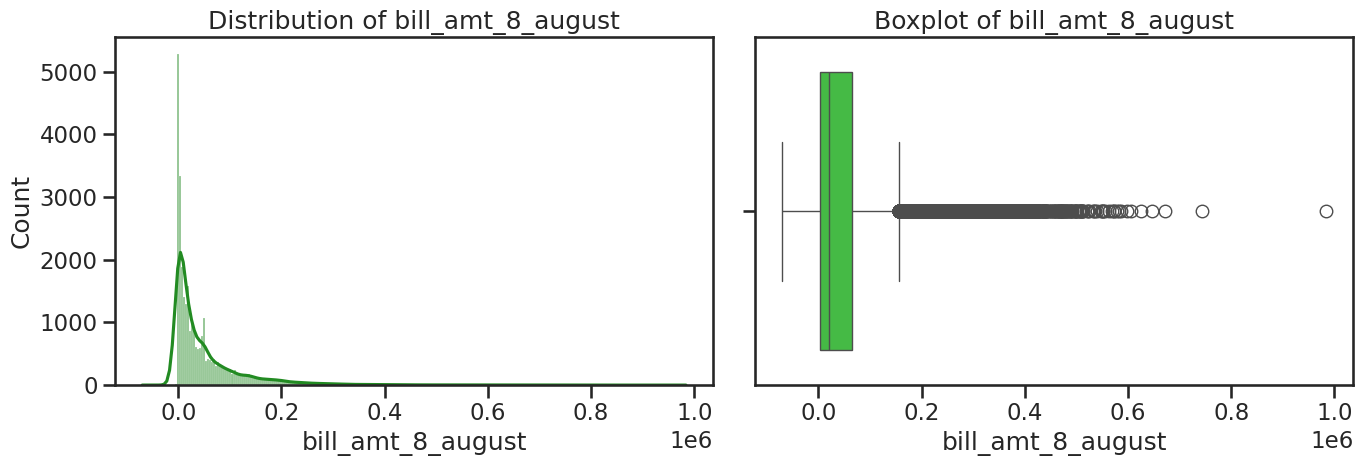

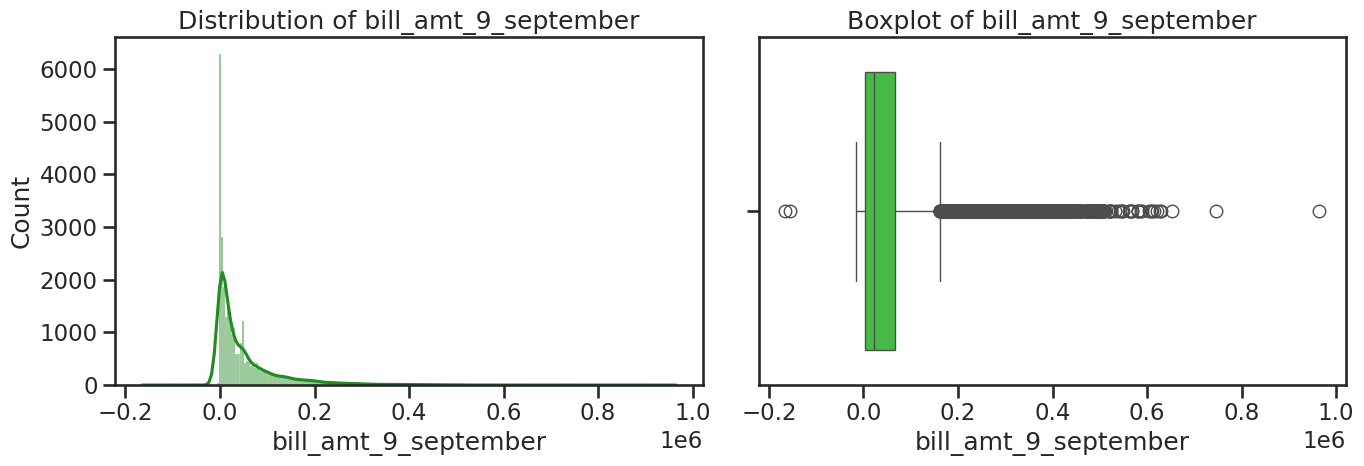

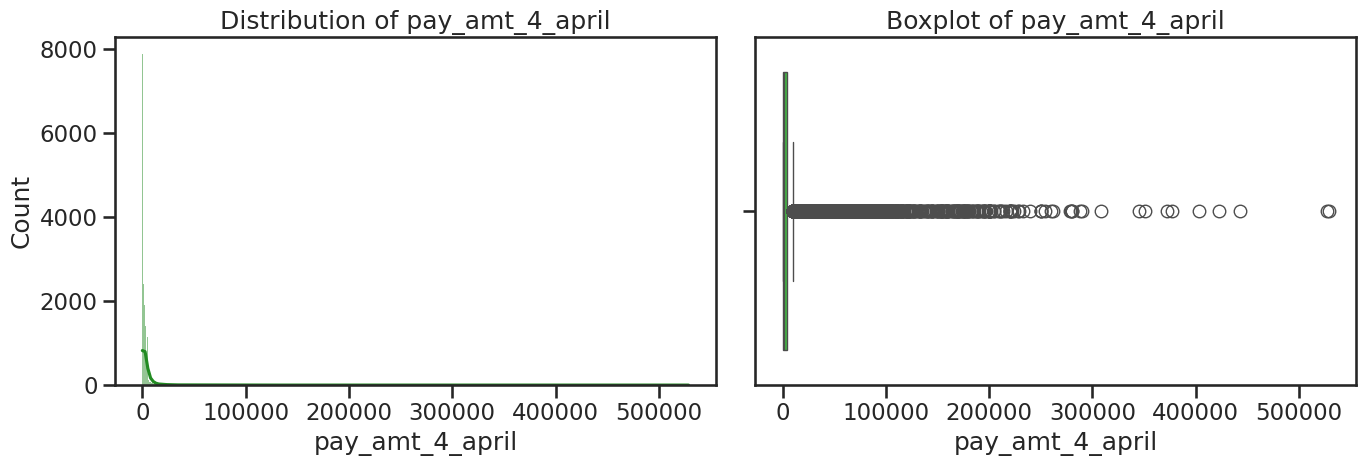

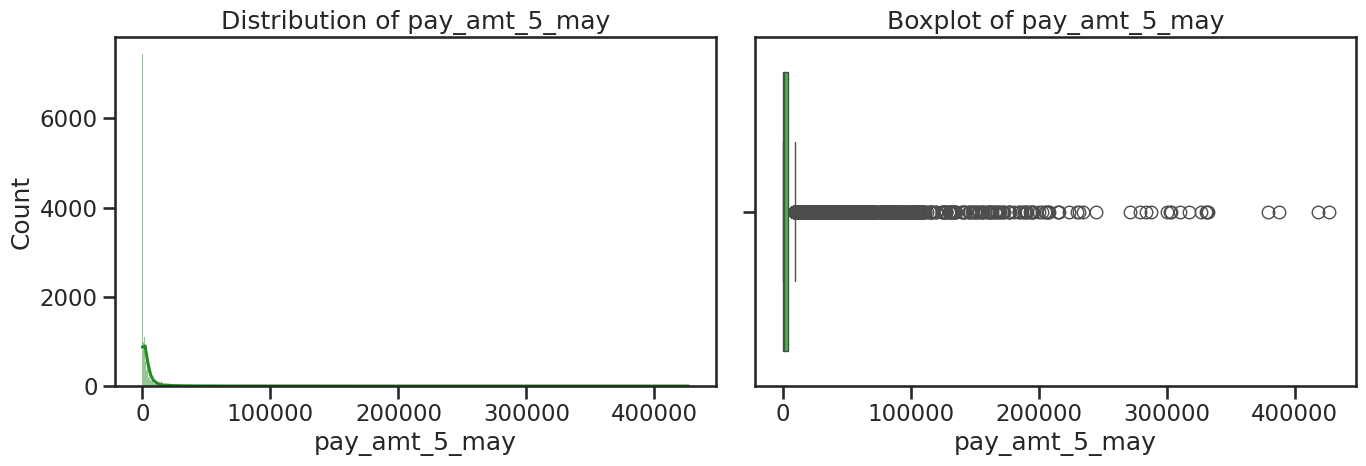

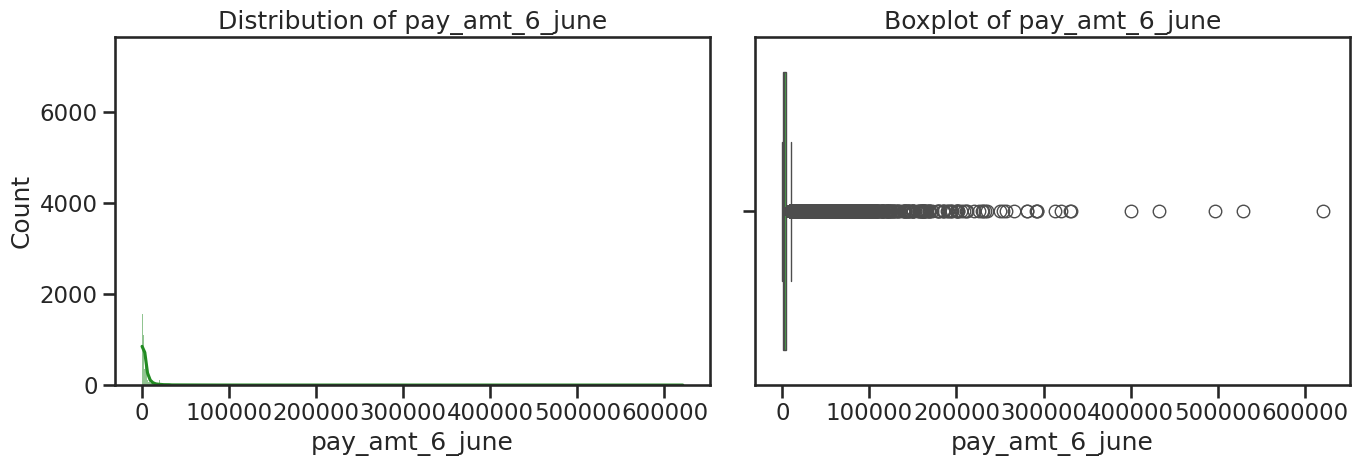

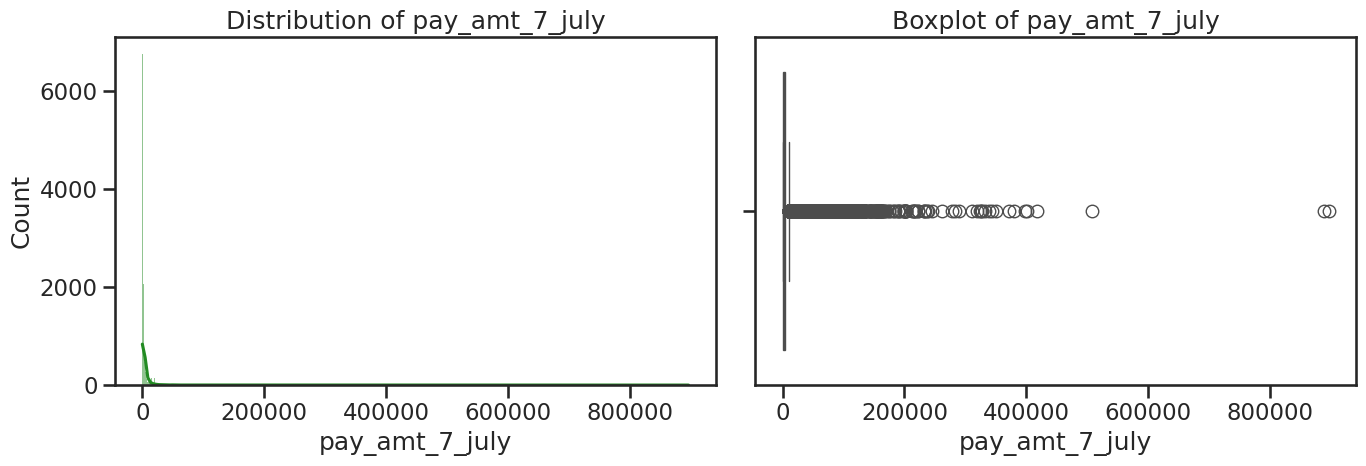

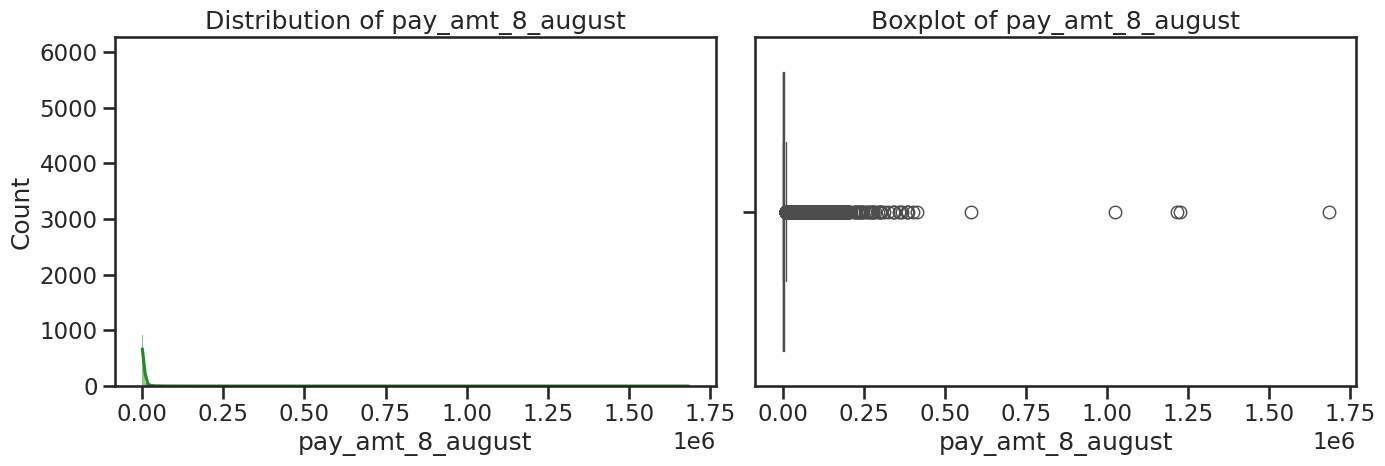

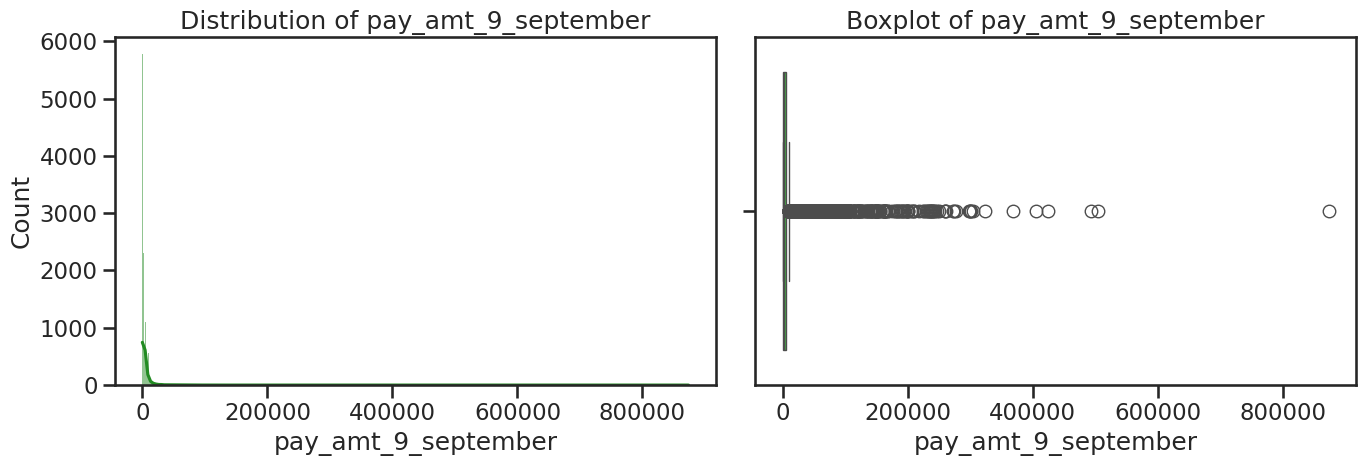

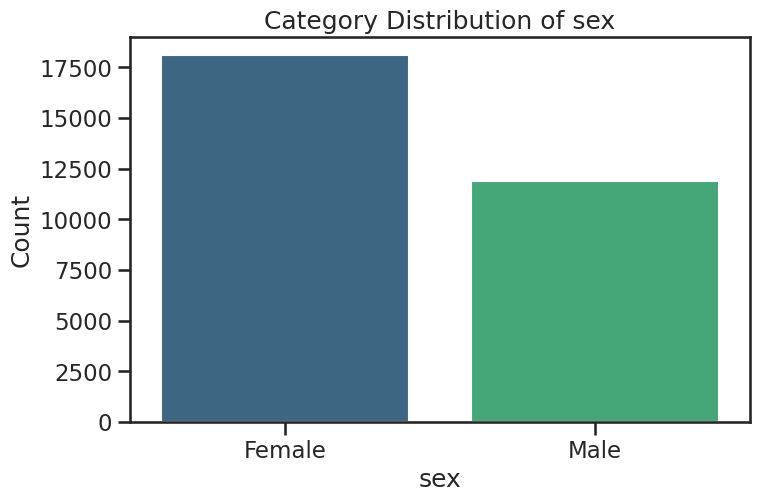

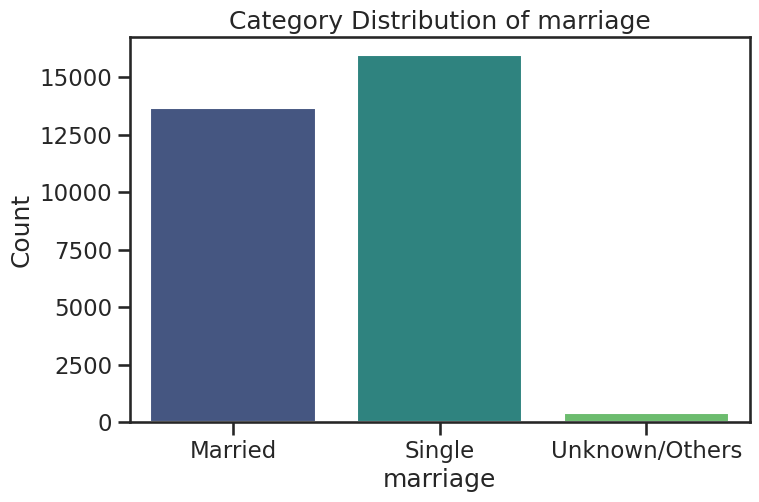

In [ ]:
from eda_utils import plot_pay_delay_distributions, plot_univariate_distributions, plot_class_distribution, plot_pay_delay_distributions

# Plot univariate distributions
# plot_class_distribution(df['default_payment_next_month'], target)
plot_univariate_distributions(df, categorical_columns)

## Range Variation in Bill & Pay Columns

There is significant variation in the range across both the `pay_amt` and `bill_amt` columns. Here’s a detailed interpretation and recommendation:

### Interpretation:
1. **High Variability in Ranges**:
    - The pay amounts range from hundreds of thousands to nearly 1.7 million.
    - The bill amounts also vary significantly, with ranges exceeding a million.

2. **Impact on Model Training**:
    - Such wide ranges can lead to issues in machine learning models, especially those sensitive to feature scaling (e.g., logistic regression, support vector machines). Features with large ranges might dominate the learning process, causing the model to be biased toward them.
    - Models like tree-based methods (e.g., Random Forest, Gradient Boosting) are less sensitive to scaling, but it’s still good practice to standardize the data for consistency.

### Options

1. **Scaling**:
    - Applying techniques like **StandardScaler** (mean=0, std=1) or **MinMaxScaler** (scales data to [0, 1] range) will normalize the data, ensuring that all features contribute equally to the model.
    - In your pipeline, include a scaling step before model training. This will handle the large variability in these ranges effectively.

2. **Outlier Consideration**:
    - While scaling will address the range issue, consider inspecting the distribution of these columns further. Extreme outliers could still impact some models and might require specialized handling (e.g., capping or transforming extreme values).


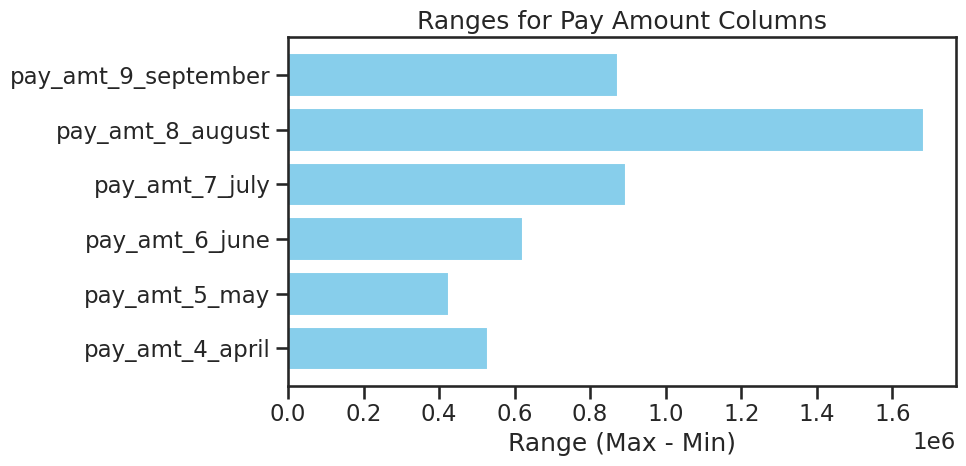

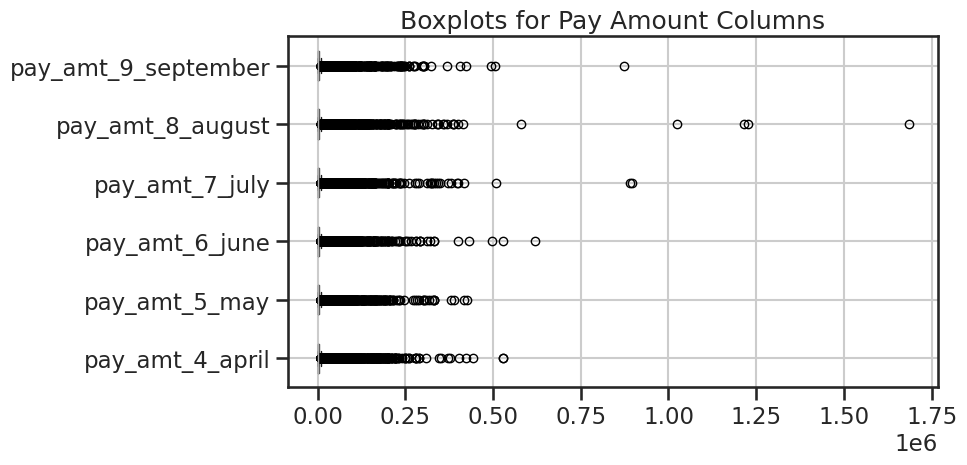

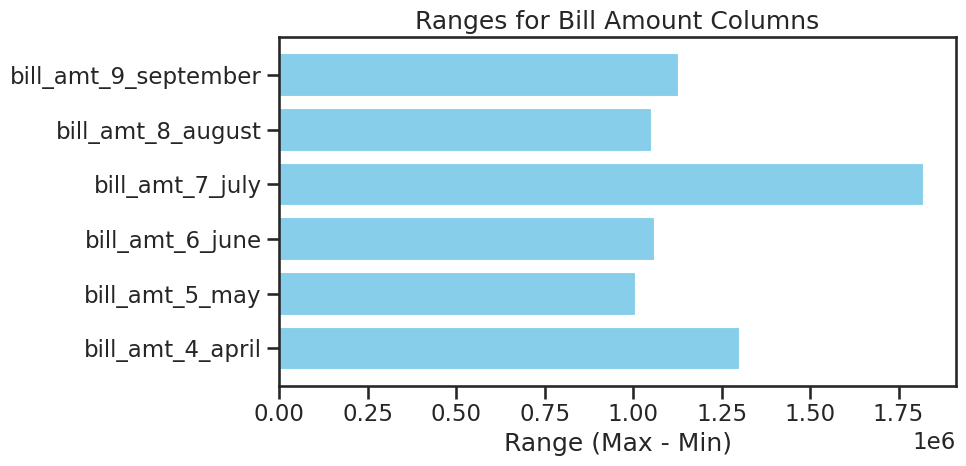

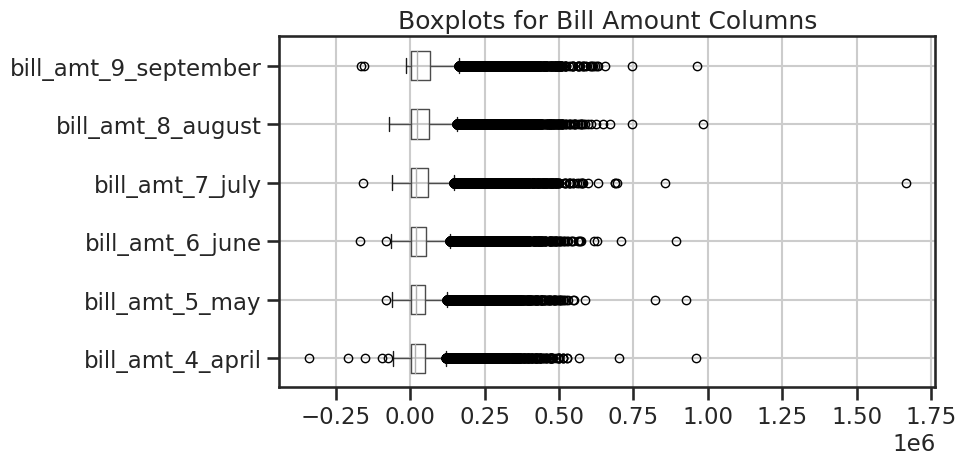

Ranges for Pay Amount Columns:
pay_amt_4_april: 528666
pay_amt_5_may: 426529
pay_amt_6_june: 621000
pay_amt_7_july: 896040
pay_amt_8_august: 1684259
pay_amt_9_september: 873552

Ranges for Bill Amount Columns:
bill_amt_4_april: 1301267
bill_amt_5_may: 1008505
bill_amt_6_june: 1061586
bill_amt_7_july: 1821353
bill_amt_8_august: 1053708
bill_amt_9_september: 1130091


In [ ]:
def calculate_column_ranges(df, columns):
    ranges = {}
    for col in columns:
        col_range = df[col].max() - df[col].min()
        ranges[col] = col_range
    return ranges

# Identify pay and bill amount columns
pay_columns = [col for col in df.columns if col.startswith('pay_amt')]
bill_columns = [col for col in df.columns if col.startswith('bill_amt')]

# Calculate the ranges
pay_ranges = calculate_column_ranges(df, pay_columns)
bill_ranges = calculate_column_ranges(df, bill_columns)

def plot_horizontal_bar(ranges, title):
    plt.figure(figsize=(10, 5))
    plt.barh(list(ranges.keys()), list(ranges.values()), color='skyblue')
    plt.title(title)
    plt.xlabel("Range (Max - Min)")
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, columns, title):
    plt.figure(figsize=(10, 5))
    df[columns].boxplot(vert=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# calculate the ranges
pay_amt_columns = [col for col in df.columns if col.startswith('pay_amt')]
bill_amt_columns = [col for col in df.columns if col.startswith('bill_amt')]

# Plot boxplots for pay_amt and bill_amt columns
plot_horizontal_bar(pay_ranges, "Ranges for Pay Amount Columns")
plot_boxplots(df, pay_amt_columns, "Boxplots for Pay Amount Columns")
plot_horizontal_bar(bill_ranges, "Ranges for Bill Amount Columns")
plot_boxplots(df, bill_amt_columns, "Boxplots for Bill Amount Columns")

# Display the ranges
print("Ranges for Pay Amount Columns:")
for col, rng in pay_ranges.items():
    print(f"{col}: {rng}")

print("\nRanges for Bill Amount Columns:")
for col, rng in bill_ranges.items():
    print(f"{col}: {rng}")

## Outlier Detection & Visualization

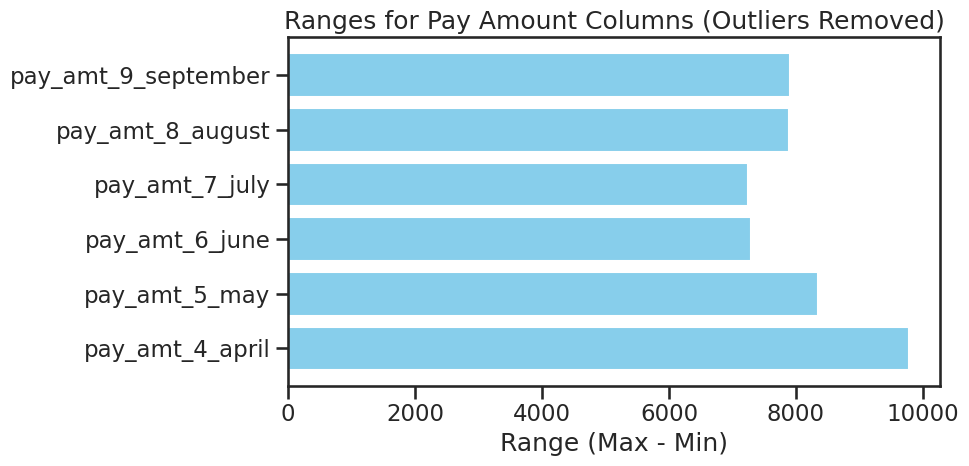

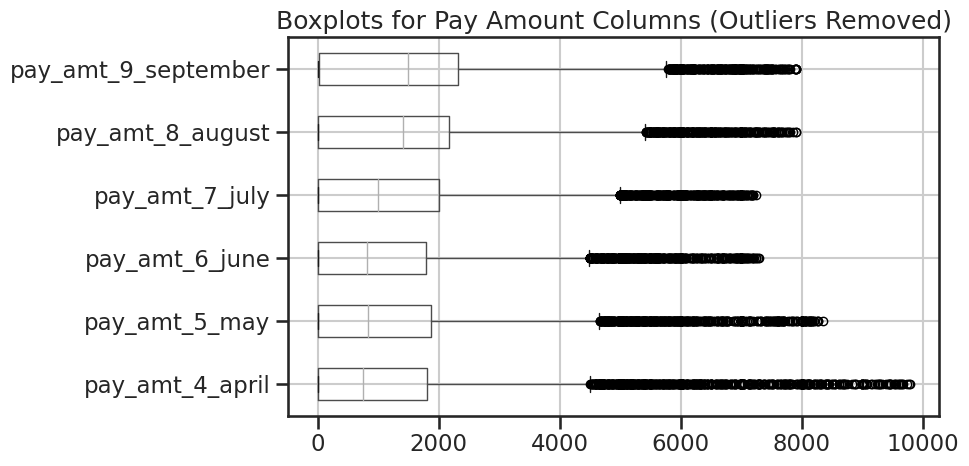

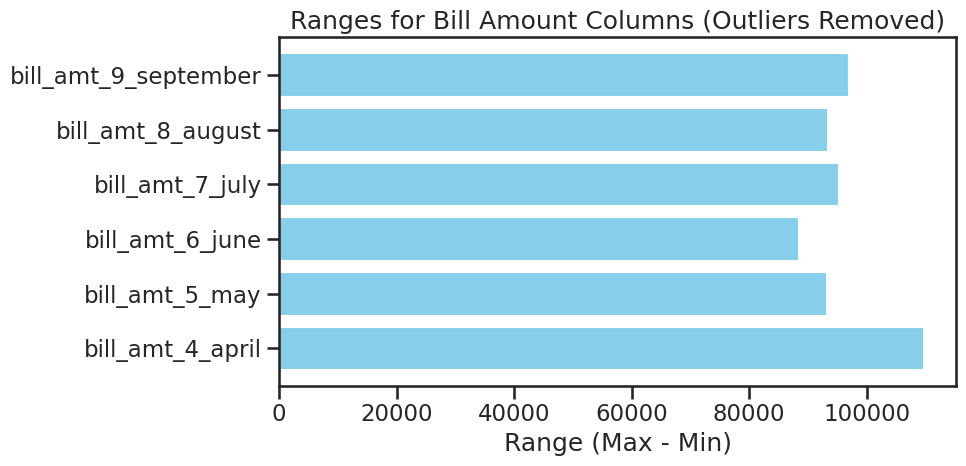

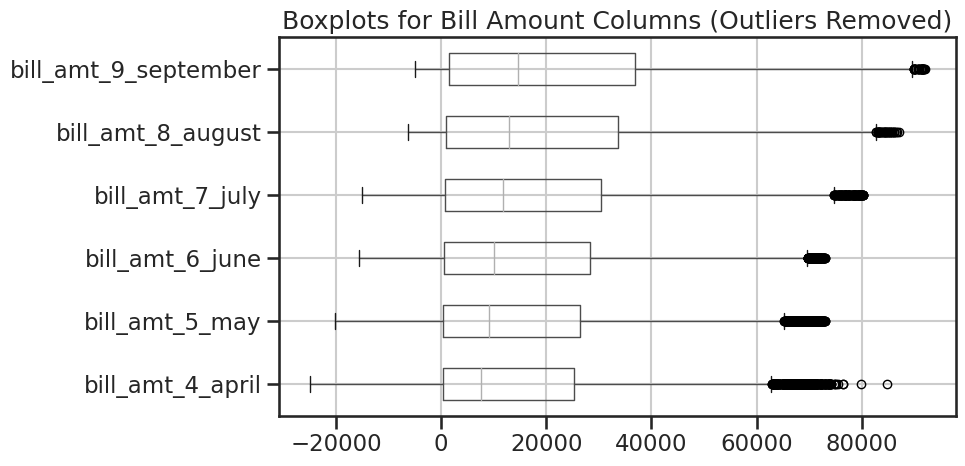

Ranges for Pay Amount Columns (Outliers Removed):
pay_amt_4_april: 9785
pay_amt_5_may: 8349
pay_amt_6_june: 7299
pay_amt_7_july: 7240
pay_amt_8_august: 7898
pay_amt_9_september: 7900

Ranges for Bill Amount Columns (Outliers Removed):
bill_amt_4_april: 109730
bill_amt_5_may: 93265
bill_amt_6_june: 88560
bill_amt_7_july: 95269
bill_amt_8_august: 93362
bill_amt_9_september: 96937


In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    # Copy the dataframe to avoid altering the original data
    df_cleaned = df.copy()

    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

# List of columns to clean
pay_amt_columns = [col for col in df.columns if col.startswith('pay_amt')]
bill_amt_columns = [col for col in df.columns if col.startswith('bill_amt')]

# Remove outliers from a copy of the data
df_cleaned = remove_outliers(df, pay_amt_columns + bill_amt_columns)

# Calculate ranges for cleaned data
pay_amt_ranges_cleaned = {col: df_cleaned[col].max() - df_cleaned[col].min() for col in pay_amt_columns}
bill_amt_ranges_cleaned = {col: df_cleaned[col].max() - df_cleaned[col].min() for col in bill_amt_columns}

# Plot the horizontal bar plots for the cleaned ranges
plot_horizontal_bar(pay_amt_ranges_cleaned, "Ranges for Pay Amount Columns (Outliers Removed)")
plot_boxplots(df_cleaned, pay_amt_columns, "Boxplots for Pay Amount Columns (Outliers Removed)")
plot_horizontal_bar(bill_amt_ranges_cleaned, "Ranges for Bill Amount Columns (Outliers Removed)")
plot_boxplots(df_cleaned, bill_amt_columns, "Boxplots for Bill Amount Columns (Outliers Removed)")

# Display the ranges
print("Ranges for Pay Amount Columns (Outliers Removed):")
for col, rng in pay_amt_ranges_cleaned.items():
    print(f"{col}: {rng}")

print("\nRanges for Bill Amount Columns (Outliers Removed):")
for col, rng in bill_amt_ranges_cleaned.items():
    print(f"{col}: {rng}")


## Outlier Analysis

### Before Outlier Removal
- **Pay Amount Columns**: The ranges were extremely large, with values like 1684259 for `pay_amt_8_august` and 873552 for `pay_amt_9_september`. These large ranges suggest that a few outliers were contributing significantly to the overall spread of the data, leading to extreme variations.
- **Bill Amount Columns**: Similarly, the ranges for bill amounts were also very large, with values reaching up to 1821353 for `bill_amt_7_july`. This wide range indicates the presence of extreme outliers that could distort the analysis and model performance.

### After Outlier Removal
- **Pay Amount Columns**: The ranges dropped dramatically to much more reasonable levels, such as 9785 for `pay_amt_4_april` and 7900 for `pay_amt_9_september`. This indicates that the majority of extreme values have been removed, leading to a more normalized distribution.
- **Bill Amount Columns**: The ranges also reduced significantly, with values now hovering around 88,000 to 110,000. While the ranges are still relatively large, they are now within a more manageable and realistic spectrum.

### Interpretation and Impact
1. **Outliers Removed as Noise**: The dramatic reduction in ranges suggests that the extreme values were likely noise rather than useful information. Removing them is likely to lead to more stable and interpretable models, as the model will not be heavily influenced by a small number of extreme data points.

2. **Reduced Variation and Improved Model Generalization**: With the outliers removed, the remaining data is more representative of typical cases, which should help the model generalize better when applied to unseen data. Extreme values often lead to overfitting, as the model tries to account for these rare occurrences.

3. **Preservation of Important Patterns**: Although the ranges have reduced, there is still sufficient variation within the cleaned data to capture meaningful patterns. The reduced ranges indicate that outliers were distorting the analysis rather than adding valuable information.

### Conclusion
Removing outliers in this case seems justified, as it likely reduces noise and helps focus the model on more representative data points. The reduction in ranges points to a more consistent and manageable dataset, which should enhance model performance by avoiding the pitfalls of overfitting to outliers. However, the decision should ultimately be validated through model performance and cross-validation, ensuring that key trends in the data are still captured effectively.

### Outlier Removal Methods
Rather than removing or capping outliers, you can apply robust scaling techniques like RobustScaler from sklearn, which uses the median and interquartile range (IQR) instead of mean and standard deviation for scaling. This makes the model less sensitive to outliers.

### Outlier Removal Methods - IQR

In [ ]:
def count_rows_with_outliers(df, columns):
    # Initialize a boolean mask for rows to keep
    mask = pd.Series([False] * len(df))

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify rows with outliers
        mask = mask | ((df[col] < lower_bound) | (df[col] > upper_bound))

    # Return the number of rows with outliers
    return mask.sum()

# Columns to check for outliers
outlier_columns = [
    'pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june',
    'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september',
    'bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june',
    'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september'
]

# Count rows with outliers using the IQR method
rows_with_outliers = count_rows_with_outliers(df, outlier_columns)
total_rows = len(df)

# Save the results for comparison
method_comparison = {
   "IQR Method" :  rows_with_outliers
}

# Display the results
print(f"Number of rows with outliers (IQR Method): {rows_with_outliers}")
print(f"Percentage of rows with outliers: {rows_with_outliers / total_rows * 100:.2f}%")
print(f"Total number of rows in dataset: {df.shape[0]}")

# Print the current comparison dictionary
print("\nMethod Comparison Summary:")
for method, rows_removed in method_comparison.items():
    print(f"{method}: {rows_removed} rows affected")


Number of rows with outliers (IQR Method): 10233
Percentage of rows with outliers: 34.15%
Total number of rows in dataset: 29965

Method Comparison Summary:
IQR Method: 10233 rows affected


### Outlier Removal Methods - Cap (Winsorize)
Rather than removing the rows, you can cap the outliers at a specific percentile, such as the 1st and 99th percentiles. This allows you to reduce the influence of extreme values while retaining the data.

In [ ]:
from scipy.stats.mstats import winsorize

# Function to apply winsorization (capping outliers)
def cap_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    df_capped = df.copy()
    for col in columns:
        lower_cap = df[col].quantile(lower_percentile)
        upper_cap = df[col].quantile(upper_percentile)
        df_capped[col] = np.clip(df[col], lower_cap, upper_cap)
    return df_capped

# Function to determine the number of rows removed due to outliers
def calculate_outlier_removal(df_original, df_capped, columns):
    # Check if any value is outside the capped range in each column
    outliers_removed = (df_original[columns] != df_capped[columns]).sum().sum()
    return outliers_removed

# Create a copy of the dataframe and apply winsorization
df_winsorized = cap_outliers(df, pay_amt_columns + bill_amt_columns)

# Determine the number of rows removed due to outliers
rows_removed_winsorized = calculate_outlier_removal(df, df_winsorized, pay_amt_columns + bill_amt_columns)

# Store the result in a dictionary
method_comparison["Winsorization"] = rows_removed_winsorized

# Display the results
print(f"Number of rows impacted by Winsorization (capping outliers): {rows_removed_winsorized}")


Number of rows impacted by Winsorization (capping outliers): 5352


### Outlier Removal Methods - Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

def apply_robust_scaler(df, columns):
    # Copy the dataframe to avoid altering the original data
    df_cleaned = df.copy()

    # Apply RobustScaler to the selected columns
    scaler = RobustScaler()
    df_cleaned[columns] = scaler.fit_transform(df_cleaned[columns])

    # Check if there are any rows impacted (i.e., scaled values still treated as outliers)
    rows_with_outliers = count_rows_with_outliers(df_cleaned, columns)
    return df_cleaned, rows_with_outliers

# Apply RobustScaler and get the number of rows affected
df_cleaned_robust, rows_with_outliers_robust = apply_robust_scaler(df, outlier_columns)

# Save the results for comparison
method_comparison["RobustScaler"] = rows_with_outliers_robust

# Display the results
print(f"Number of rows with outliers (RobustScaler): {rows_with_outliers_robust}")
print(f"Percentage of rows with outliers: {rows_with_outliers_robust / total_rows * 100:.2f}%")
print(f"Total number of rows in dataset: {df.shape[0]}")

# Print the current comparison dictionary
print("\nMethod Comparison Summary:")
for method, rows_removed in method_comparison.items():
    print(f"{method}: {rows_removed} rows affected")

Number of rows with outliers (RobustScaler): 10233
Percentage of rows with outliers: 34.15%
Total number of rows in dataset: 29965

Method Comparison Summary:
IQR Method: 10233 rows affected
Winsorization: 5352 rows affected
RobustScaler: 10233 rows affected


In [ ]:
from scipy.stats import mstats
from sklearn.preprocessing import RobustScaler
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="Warning: 'partition' will ignore the 'mask' of the MaskedArray.")


def combined_outlier_handling(df, columns):
    # Step 1: Cap (Winsorize) outliers
    df_cleaned = df.copy()
    for col in columns:
        df_cleaned[col] = mstats.winsorize(df_cleaned[col], limits=[0.01, 0.01])

    # Step 2: Apply IQR filtering
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    # Step 3: Apply RobustScaler
    scaler = RobustScaler()
    df_cleaned[columns] = scaler.fit_transform(df_cleaned[columns])

    # Count the number of rows remaining after combined outlier handling
    rows_with_outliers = count_rows_with_outliers(df_cleaned, columns)

    return df_cleaned, rows_with_outliers

# Apply the combined method
df_combined, rows_with_outliers_combined = combined_outlier_handling(df, outlier_columns)

# Save the results for comparison
method_comparison["Combined Method"] = rows_with_outliers_combined

# Display the results
print(f"Number of rows with outliers (Combined Method): {rows_with_outliers_combined}")
print(f"Percentage of rows with outliers: {rows_with_outliers_combined / total_rows * 100:.2f}%")
print(f"Total number of rows in dataset: {df.shape[0]}")

# Print the updated comparison dictionary
print("\nMethod Comparison Summary:")
for method, rows_removed in method_comparison.items():
    print(f"{method}: {rows_removed} rows affected")


Number of rows with outliers (Combined Method): 2544
Percentage of rows with outliers: 8.49%
Total number of rows in dataset: 29965

Method Comparison Summary:
IQR Method: 10233 rows affected
Winsorization: 5352 rows affected
RobustScaler: 10233 rows affected
Combined Method: 2544 rows affected


### Outlier Removal Methods Analysis

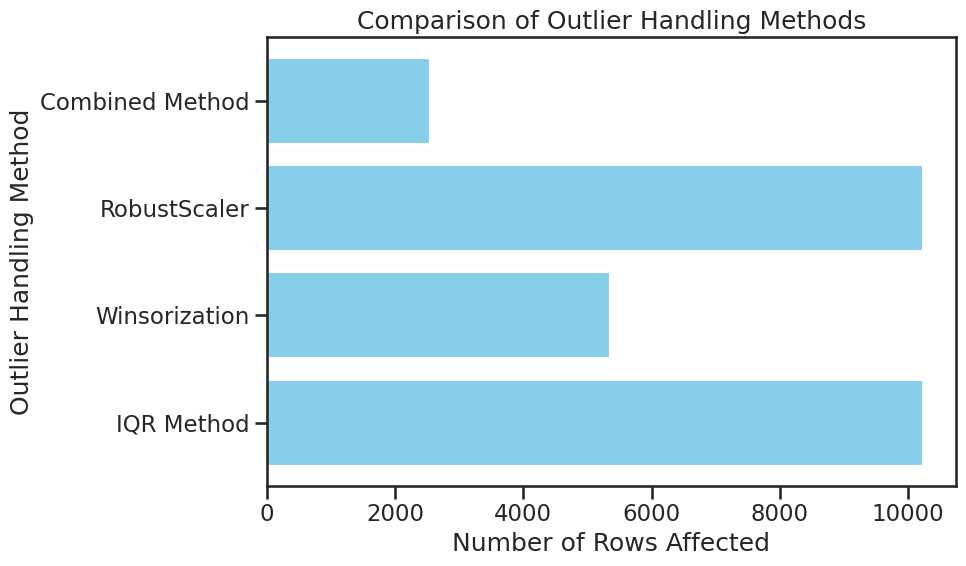

In [ ]:
def plot_method_comparison(results):
    methods = list(results.keys())
    affected_rows = list(results.values())

    plt.figure(figsize=(10, 6))
    plt.barh(methods, affected_rows, color='skyblue')
    plt.xlabel("Number of Rows Affected")
    plt.ylabel("Outlier Handling Method")
    plt.title("Comparison of Outlier Handling Methods")
    plt.tight_layout()
    plt.show()

# Plot the method comparison
plot_method_comparison(method_comparison)


#### Preprocess Pipeline Steps

**Preprocessing Steps for Loan Default Data:**

1. **Outlier Handling Using a Combined Approach:**
    - **Description:** This method sequentially applies three techniques to handle outliers: Winsorization (capping), Robust Scaling, and the IQR method. It allows for better control over extreme values while retaining valuable data.
    - **Steps:**
        1. **Winsorization:** Capping extreme values at specified percentiles (e.g., 1st and 99th) to reduce the influence of outliers without removing them.
        2. **Robust Scaling:** Scaling the data using median and IQR, making it less sensitive to outliers compared to standard scaling.
        3. **IQR Method:** Removing rows where values still fall outside the acceptable range after scaling.
    - **Purpose:** Balances the retention of valuable data with effective outlier management, ensuring that extreme values do not skew model performance.


#### EDA Utils

In [ ]:
script_content=r'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#--------   Data Overview   --------#

def data_overview(X):
    # Calculate missing values and their percentage
    missing_values = X.isnull().sum().sum()
    missing_percentage = (missing_values / len(X)) * 100

    # Calculate the number of duplicate rows
    duplicate_rows = X.duplicated().sum()

    # Print missing values, missing percentage, and duplicate information
    print("Missing Values:", missing_values)
    print("Missing Percentage:", missing_percentage)
    print(f"Number of Duplicate Rows: {duplicate_rows}\n")

    # Print basic information
    X.info()

#--------   Plot Class Distribution   --------#

def plot_class_distribution(y_train, target_name):
    sns.set()
    sns.set(style="ticks")
    sns.set_context('notebook')
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='viridis')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Univariate Distributions   --------#

def plot_univariate_distributions(X, categorical_columns):
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    sns.set(style="ticks")
    sns.set_context('talk')

    # Plot histograms and KDE plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(14, 5))

        # Histogram and KDE plot
        plt.subplot(1, 2, 1)
        sns.histplot(X[col], kde=True, color='forestgreen')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)

        # Boxplot to detect outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=X[col], color='limegreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

    # Plot bar plots for other categorical features
    for col in categorical_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=X[col], hue=X[col], palette='viridis')
        plt.title(f'Category Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

def plot_pay_delay_distributions(X, pay_delay_columns, aggregate_threshold=10):
    sns.set(style="ticks")
    sns.set_context('talk')

    for col in pay_delay_columns:
        # Aggregate categories with low counts into a single "Other" category
        value_counts = X[col].value_counts()
        low_count_categories = value_counts[value_counts < aggregate_threshold].index
        X[col] = X[col].apply(lambda x: 'Other' if x in low_count_categories else x)

        plt.figure(figsize=(10, 5))

        # Count plot for pay_delay columns
        sns.countplot(x=X[col], hue=X[col], palette='viridis', order=value_counts.index)
        plt.title(f'Distribution of {col.replace("_", " ").title()} (Aggregated)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Rotate the x-axis labels for better visibility
        plt.xticks(rotation=45)
        plt.show()

'''

# Write the script to a file
with open("eda_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to eda_utils.py")
# Reload script to make functions available for use
import importlib
import eda_utils
importlib.reload(eda_utils)

from eda_utils import *

Script successfully written to eda_utils.py


#### Loan Data Utils

In [ ]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import classification_report

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define primary, bill, and pay columns
primary_columns = ['limit_bal', 'sex', 'education', 'marriage', 'age']
bill_columns = ['bill_amt_4_april', 'bill_amt_5_may', 'bill_amt_6_june', 'bill_amt_7_july', 'bill_amt_8_august', 'bill_amt_9_september']
pay_columns = ['pay_amt_4_april', 'pay_amt_5_may', 'pay_amt_6_june', 'pay_amt_7_july', 'pay_amt_8_august', 'pay_amt_9_september']
ordinal_columns = ['education', 'pay_delay_9_september', 'pay_delay_8_august', 'pay_delay_7_july', 'pay_delay_6_june', 'pay_delay_5_may', 'pay_delay_4_april']

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def split_features_target(df, target):
    try:
        X = df.drop(columns=[target])
        y = df[target]
        logging.info("Features and target split successfully.")
    except Exception as e:
        logging.error(f"Error splitting features and target: {e}")
        return None, None
    return X, y


def clean_column_names(df):
    try:
        df.columns = [col.lower().replace(' ', '_') for col in df.columns]
        logging.info("Column names cleaned successfully.")
    except Exception as e:
        logging.error(f"Error cleaning column names: {e}")
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
        logging.info("ID column removed.")
    return df

def process_sex_column(df):
    try:
        if 'sex' in df.columns:
            df['sex'] = df['sex'].replace({1: 'Male', 2: 'Female'})
            df['sex'] = df['sex'].astype('category')
            logging.info("Sex column processed and converted to categorical successfully.")
        else:
            logging.warning("Sex column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing sex column: {e}")
    return df

def process_marriage_column(df):
    try:
        if 'marriage' in df.columns:
            df['marriage'] = df['marriage'].replace({0: 'Unknown/Others', 3: 'Unknown/Others'})
            df['marriage'] = df['marriage'].replace({1: 'Married', 2: 'Single'})
            df['marriage'] = pd.Categorical(df['marriage'], categories=['Married', 'Single', 'Unknown/Others'], ordered=False)
            logging.info("Marriage column processed and converted to categorical successfully.")
        else:
            logging.warning("Marriage column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error processing marriage column: {e}")
    return df


def rename_pay_columns(df):
    try:
        # Only rename if the original columns exist
        if all(col in df.columns for col in ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']):
            pay_columns_new_names = {
                'pay_0': 'pay_delay_9_september',
                'pay_2': 'pay_delay_8_august',
                'pay_3': 'pay_delay_7_july',
                'pay_4': 'pay_delay_6_june',
                'pay_5': 'pay_delay_5_may',
                'pay_6': 'pay_delay_4_april'
            }
            df = df.rename(columns=pay_columns_new_names)
            logging.info("Pay delay columns renamed successfully.")
        else:
            logging.warning("Some or all of the expected pay columns are missing. Renaming skipped.")
    except Exception as e:
        logging.error(f"Error renaming pay delay columns: {e}")
    return df

def rename_bill_and_payment_columns(df):
    try:
        # Correct renaming of bill_amt and pay_amt columns
        bill_amt_new_names = {
            'bill_amt1': 'bill_amt_9_september',
            'bill_amt2': 'bill_amt_8_august',
            'bill_amt3': 'bill_amt_7_july',
            'bill_amt4': 'bill_amt_6_june',
            'bill_amt5': 'bill_amt_5_may',
            'bill_amt6': 'bill_amt_4_april'
        }

        pay_amt_new_names = {
            'pay_amt1': 'pay_amt_9_september',
            'pay_amt2': 'pay_amt_8_august',
            'pay_amt3': 'pay_amt_7_july',
            'pay_amt4': 'pay_amt_6_june',
            'pay_amt5': 'pay_amt_5_may',
            'pay_amt6': 'pay_amt_4_april'
        }

        df = df.rename(columns={**bill_amt_new_names, **pay_amt_new_names})
        logging.info("Bill and payment columns renamed successfully.")
    except Exception as e:
        logging.error(f"Error renaming bill and payment columns: {e}")
    return df


def label_pay_columns(df, pay_columns):
    try:
        # Only label the pay_delay_* columns, not pay_amt_*
        pay_labels = {
            -2: "No consumption",
            -1: "Paid in full",
            0: "Revolving credit",
            1: "1 month delay",
            2: "2 months delay",
            3: "3 months delay",
            4: "4 months delay",
            5: "5 months delay",
            6: "6 months delay",
            7: "7 months delay",
            8: "8 months delay",
            9: "9+ months delay"
        }

        for col in pay_columns:
            # Ensure we're only mapping the delay columns and not payment amount columns
            if 'pay_delay' in col and col in df.columns:
                df[col] = df[col].map(pay_labels)
                logging.info(f"Column {col} labeled successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error labeling pay columns: {e}")
    return df

def convert_pay_columns_to_ordinal(df, pay_columns):
    try:
        pay_order = [
            "No consumption",  # -2
            "Paid in full",    # -1
            "Revolving credit", # 0
            "1 month delay",   # 1
            "2 months delay",  # 2
            "3 months delay",  # 3
            "4 months delay",  # 4
            "5 months delay",  # 5
            "6 months delay",  # 6
            "7 months delay",  # 7
            "8 months delay",  # 8
            "9+ months delay"  # 9
        ]

        for col in pay_columns:
            # Ensure only delay columns are converted to categorical
            if 'pay_delay' in col and col in df.columns:
                df[col] = pd.Categorical(df[col], categories=pay_order, ordered=True)
                logging.info(f"Column {col} converted to ordinal successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")

    except Exception as e:
        logging.error(f"Error converting pay columns to ordinal categories: {e}")
    return df


def convert_ordinal_to_category(df, ordinal_columns):
    try:
        for col in ordinal_columns:
            if col in df.columns:
                df[col] = df[col].astype('category')
                logging.info(f"Column {col} converted to category successfully.")
            else:
                logging.error(f"Column {col} not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting ordinal columns to category: {e}")
    return df

def convert_education_to_ordinal(df):
    try:
        # Explicitly map all values to handle known categories
        education_mapping = {
            1: 'Graduate School',
            2: 'University',
            3: 'High School',
            4: 'Other/Unknown',
            5: 'Other/Unknown',
            6: 'Other/Unknown',
            0: 'Other/Unknown'  # Handle the 0 value as well
        }

        df['education'] = df['education'].replace(education_mapping)

        # Define the order of education categories
        education_order = [
            "Other/Unknown",    # Grouped 0, 4, 5, 6 together
            "High School",      # 3
            "University",       # 2
            "Graduate School"   # 1
        ]

        if 'education' in df.columns:
            # Convert the education column to a categorical type with the specified order
            df['education'] = pd.Categorical(df['education'], categories=education_order, ordered=True)
            logging.info("Education column converted to ordinal categories successfully.")
        else:
            logging.error("Education column not found in DataFrame.")
    except Exception as e:
        logging.error(f"Error converting education column to ordinal categories: {e}")
    return df


# Utility and validation functions first
def check_column_integrity(df, expected_columns):
    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        logging.error(f"Missing columns: {missing_columns}")
    else:
        logging.info("All expected columns are present.")

def validate_data_types(df, ordinal_columns):
    for col in ordinal_columns:
        if col in df.columns:
            if not pd.api.types.is_categorical_dtype(df[col]):
                logging.warning(f"Column {col} is not correctly set as categorical.")
            else:
                logging.info(f"Column {col} is correctly set as categorical with the following categories: {df[col].cat.categories}")
        else:
            logging.error(f"Column {col} not found in DataFrame.")
    logging.info("Data type validation complete.")

def reorder_columns(df):
    try:
        # Define the order of the pay_delay columns in chronological order
        pay_delay_order = [
            'pay_delay_4_april',
            'pay_delay_5_may',
            'pay_delay_6_june',
            'pay_delay_7_july',
            'pay_delay_8_august',
            'pay_delay_9_september'
        ]

        # Combine primary, bill, pay, and pay_delay columns with other columns
        other_columns = [col for col in df.columns if col not in primary_columns + bill_columns + pay_columns + pay_delay_order]
        df = df[primary_columns + bill_columns + pay_columns + pay_delay_order + other_columns]
        logging.info("Columns reordered successfully.")
    except Exception as e:
        logging.error(f"Error reordering columns: {e}")
    return df



def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        try:
            df = clean_column_names(df)
            df = remove_id_column(df)
            df = rename_pay_columns(df)
            df = rename_bill_and_payment_columns(df)
            df = label_pay_columns(df, [col for col in df.columns if 'pay_delay' in col])
            df = convert_pay_columns_to_ordinal(df, [col for col in df.columns if 'pay_delay' in col])
            df = reorder_columns(df)
            df = convert_education_to_ordinal(df)
            df = process_sex_column(df)  # Process the sex column separately
            df = process_marriage_column(df)  # Process the marriage column separately
            df = convert_ordinal_to_category(df, ordinal_columns)

            # Run validation checks
            check_column_integrity(df, primary_columns + bill_columns + pay_columns + ordinal_columns)
            validate_data_types(df, ordinal_columns)

            X, y = split_features_target(df, target)
            logging.info("Data loaded and preprocessed successfully.")
            return X, y
        except Exception as e:
            logging.error(f"Error in data preprocessing: {e}")
            return None, None
    return None, None


def check_categorical_order(df, columns):
    for col in columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            print(f"Column: {col}")
            print(f"Categories: {df[col].cat.categories}")
            print(f"Ordered: {df[col].cat.ordered}\n")
        else:
            print(f"Column: {col} is not categorical.\n")


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *


Script successfully written to loan_data_utils.py
